In [3]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [4]:
air=pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [6]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
#Rename the Column 
air.rename(columns={'ID#':'id','Award?':'award'},inplace=True)

In [9]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
#Dropping ID and award  from dataset
air1 =  air.drop(['id','award'], axis=1)
air1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [11]:
air1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [12]:
# Converting into numpy array
air1_array = air1.values
air1_array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [13]:
# Normalizing the numerical data 
air_normal = scale(air1_array)

In [14]:
air_normal

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [15]:
pd.DataFrame(air_normal)

,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


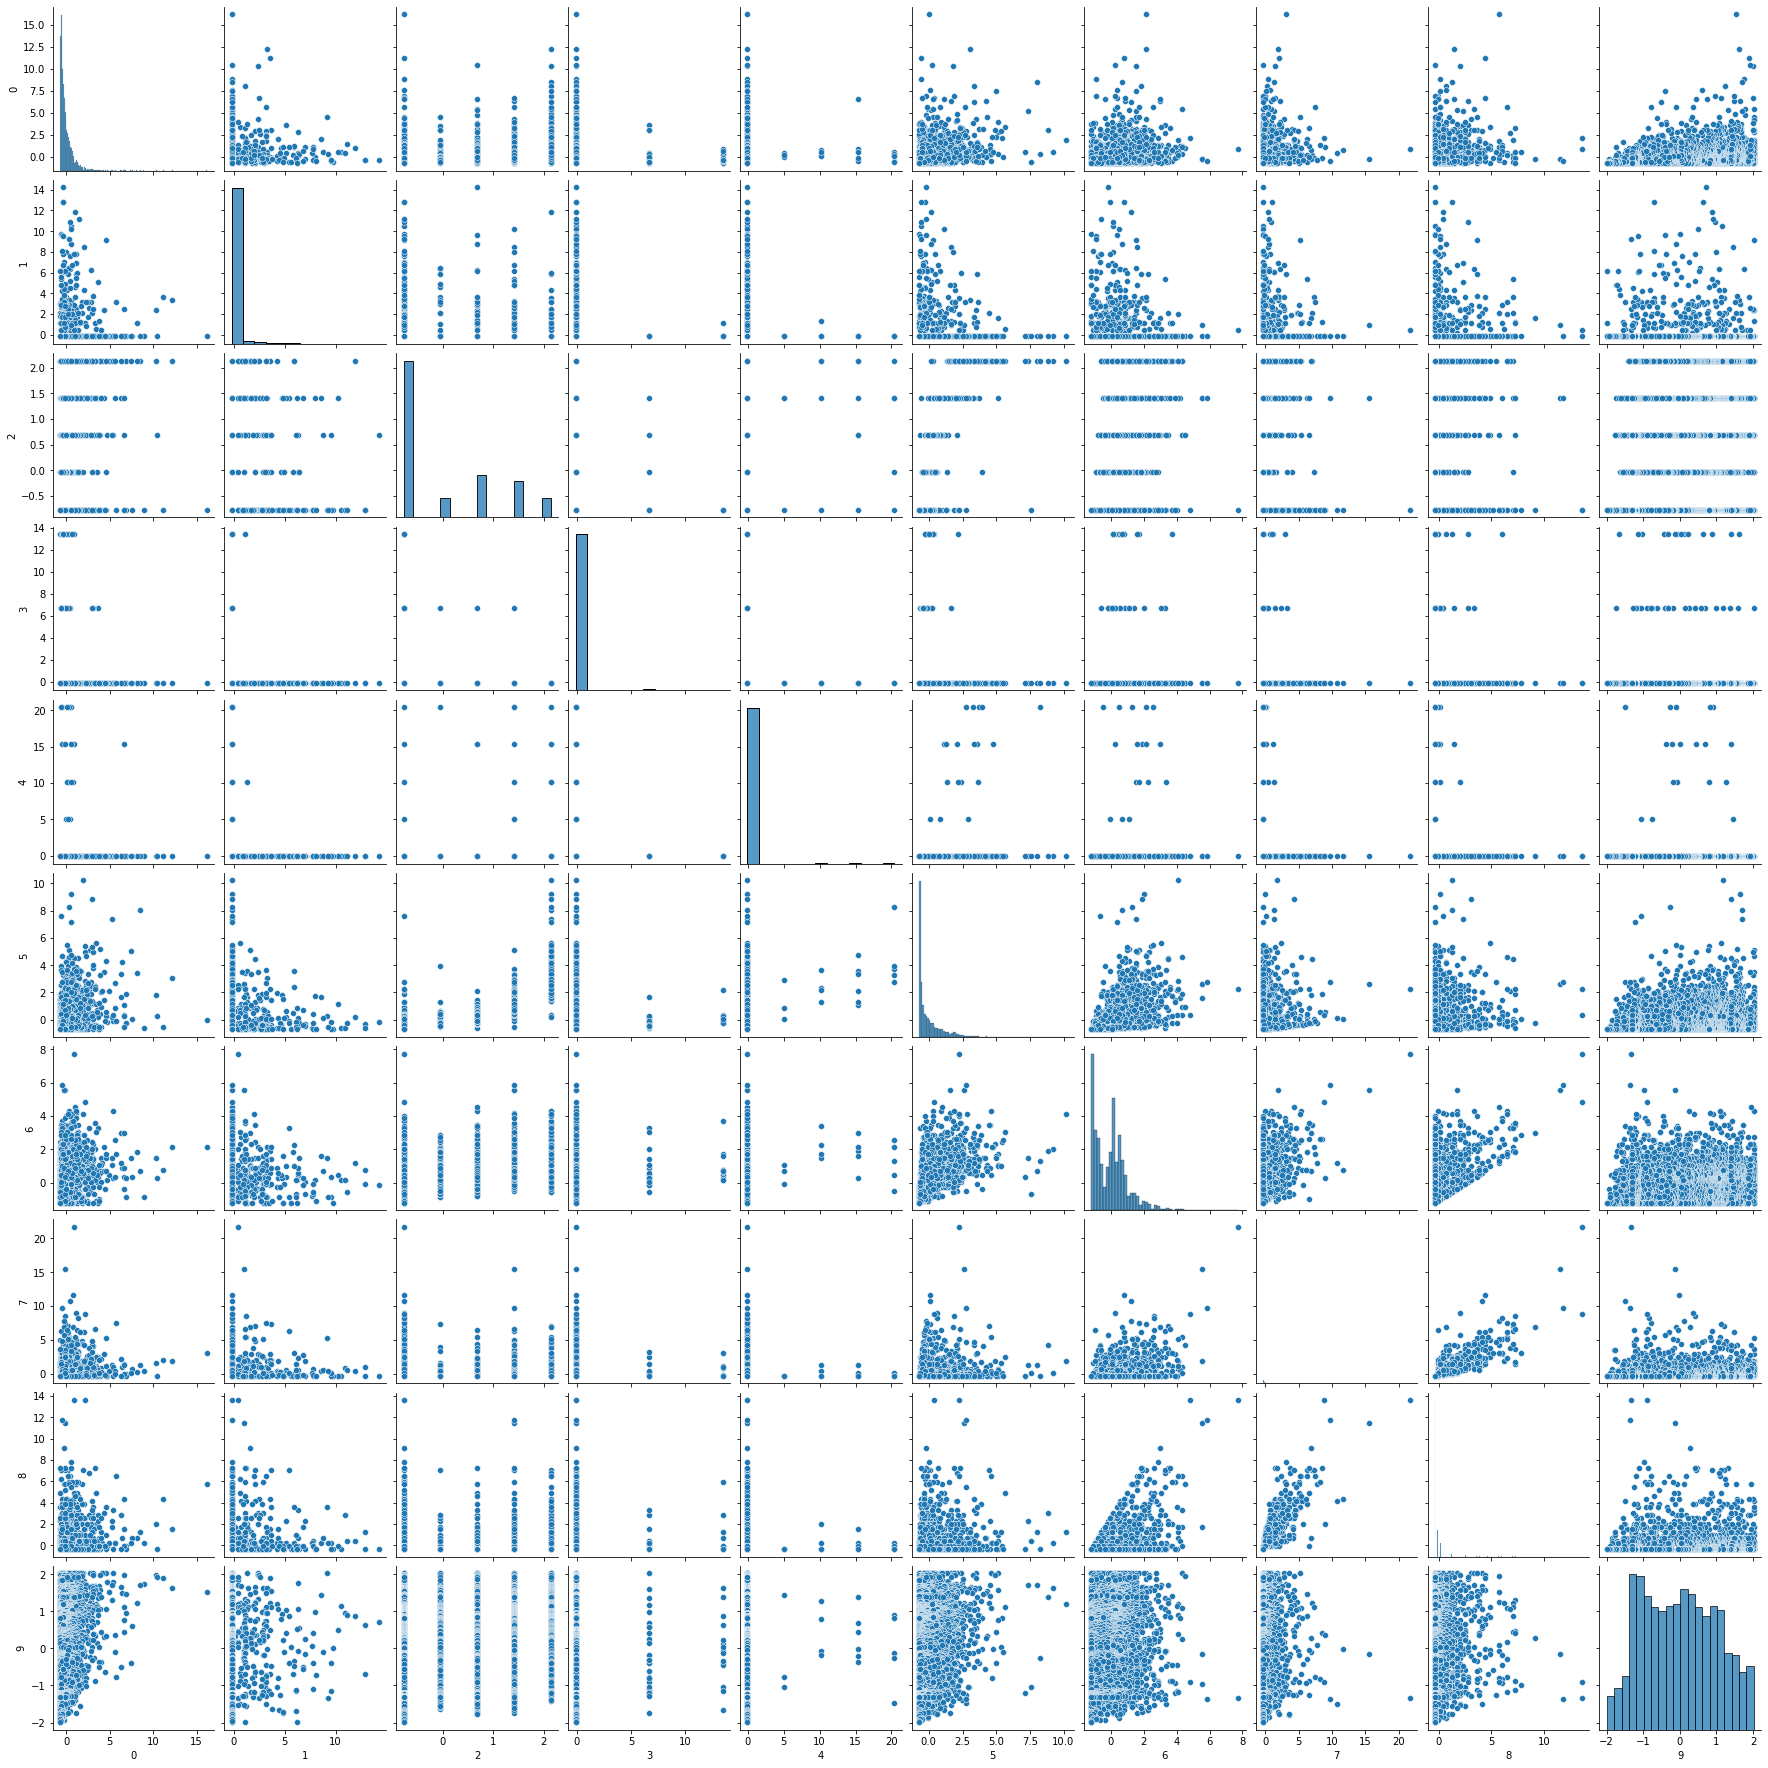

In [16]:
import seaborn as sns
sns.pairplot(pd.DataFrame(air_normal))

In [17]:
pca = PCA(n_components =10)
pca_values = pca.fit_transform(air_normal)

In [18]:
pca_values

array([[-1.30259849e+00, -6.67213250e-02, -8.37479123e-01, ...,
         3.16841322e-01,  4.98188551e-02, -1.10589017e-02],
       [-1.28625898e+00, -6.33917827e-02, -7.84258800e-01, ...,
         2.44978694e-01,  6.79491185e-02,  1.67409252e-03],
       [-1.03252210e+00, -1.36880674e-01, -8.10758550e-01, ...,
         1.28470690e-01,  1.89054521e-01,  5.37186026e-02],
       ...,
       [-2.34556545e-01, -5.78579087e-01,  5.58146454e-01, ...,
         4.90914923e-01, -2.63098576e-01, -1.24815991e-01],
       [-1.52141921e+00,  7.26827232e-01,  3.91418782e-01, ...,
         4.13237922e-01, -7.92265627e-02, -1.12328870e-02],
       [-1.96207193e+00,  4.09944472e-01,  4.90439060e-01, ...,
         4.32381816e-01, -1.74792449e-02, -7.80101468e-02]])

In [19]:
var = pca.explained_variance_ratio_

In [20]:
ind_var=(np.round(var,decimals=4)*100)
ind_var

array([30.5 , 17.27, 10.51, 10.08,  9.6 ,  9.06,  6.72,  3.63,  1.39,
        1.24])

In [21]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 30.5 ,  47.77,  58.28,  68.36,  77.96,  87.02,  93.74,  97.37,
        98.76, 100.  ])

In [ ]:
# with PCA  98.75% variance for 9 components # with 8 components variance of  above 95% (97.37%) is achieved

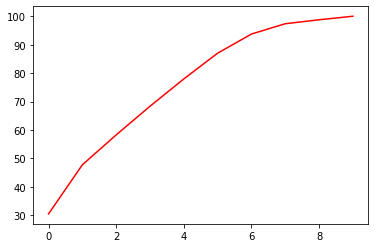

In [22]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

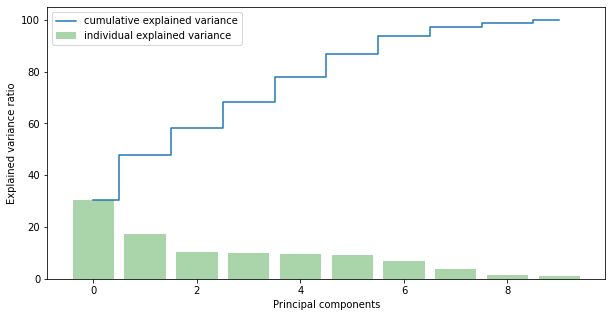

Cumulative explained ratio: [ 30.5   47.77  58.28  68.36  77.96  87.02  93.74  97.37  98.76 100.  ]


In [23]:
# Cumulative and Individual variance
plt.figure(figsize=(10, 5))
plt.bar(range(len(ind_var)), 
        ind_var, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(var1)),
         var1, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

#cum_var_ratio = np.cumsum(var_ratio)
print("Cumulative explained ratio:",var1)

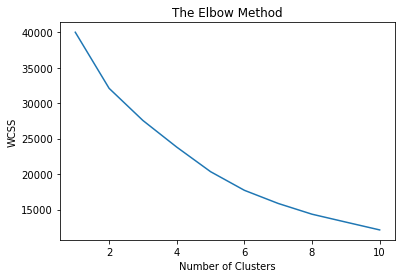

In [24]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i,random_state=0)
    clf.fit(air_normal)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()


In [ ]:
#Elbow curve does not show show the right cluster.

In [26]:
#PCA with silhouette_score Method

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(air_normal)



In [31]:
print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [32]:
print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [33]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [34]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 2 The average silhouette_score is : 0.3639788167896175


C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 3 The average silhouette_score is : 0.34038142310682834


C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 4 The average silhouette_score is : 0.33811895596476305


C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 5 The average silhouette_score is : 0.34885887029453005


C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 6 The average silhouette_score is : 0.3665724589453308


C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 7 The average silhouette_score is : 0.26773101005827354


C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 8 The average silhouette_score is : 0.28284236665851537


C:\Users\Sys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 9 The average silhouette_score is : 0.2708765675709241


In [ ]:
# Based on The average silhouette_score - Cluster 6  has closest value to 1  - 0.36657 

In [ ]:
#Model 1 Kmeans with PCA - 95%- Clusters =6

In [58]:
# k-means
from sklearn.cluster import KMeans
KM=KMeans(6,random_state=42)
KM.fit(pca_std_df)

KMeans(n_clusters=6, random_state=42)

In [59]:
KM.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
clusters=pd.Series(KM.labels_)
print("Clusters",'',clusters.unique())

Clusters  [0 2 4 5 1 3]


In [61]:
air1['Clusters'] =clusters

In [62]:
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [63]:
result_kmeans=air1.groupby(air1.Clusters).mean()
result_kmeans=pd.DataFrame(result_kmeans)
result_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clusters,,,,,,,,,,
0,42329.807377,49.405738,1.186475,1.000000,1.000410,4263.749180,6.575000,208.886885,0.638525,3704.174590
1,117326.186441,5445.305085,2.033898,1.000000,1.000000,19059.610169,12.305085,965.796610,2.881356,3874.830508
2,117304.675634,50.634128,3.690238,1.000000,1.001537,38668.126826,18.837048,327.721752,0.989239,4844.644120
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233
5,187792.460993,471.163121,2.262411,1.000000,1.000000,33236.602837,27.978723,5773.602837,16.730496,4684.851064


In [ ]:
# Applying Clusters in Original Dataframe

In [64]:
air['Clusters'] =clusters
air

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


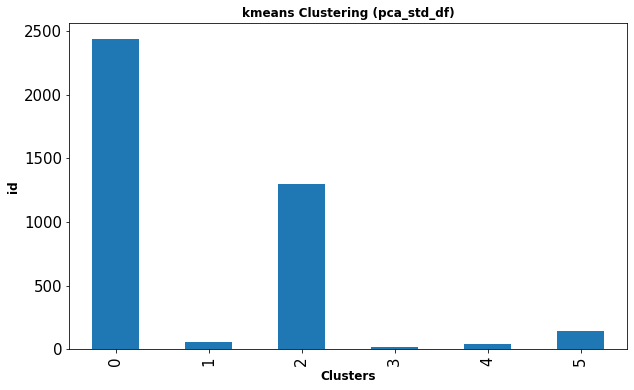

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
air.groupby(['Clusters']).count()['id'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('id', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
#Model 2 - Kmeans without pca -Clusters = 6

In [35]:
# k-means
from sklearn.cluster import KMeans
KM=KMeans(6,random_state=42)
KM.fit(air_normal)

KMeans(n_clusters=6, random_state=42)

In [36]:
KM.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [37]:
clusters=pd.Series(KM.labels_)
print("Clusters",'',clusters.unique())

Clusters  [0 5 4 1 3 2]


In [38]:
air1['Clusters'] =clusters

In [39]:
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,5
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [41]:
result_kmeans=air1.groupby(air1.Clusters).mean()
result_kmeans=pd.DataFrame(result_kmeans)
result_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clusters,,,,,,,,,,
0,56473.826460,131.327320,1.248282,1.000000,1.000859,5052.073883,7.375430,252.997423,0.787801,5758.364261
1,189351.443709,806.456954,2.218543,1.000000,1.000000,32542.834437,27.549669,5609.907285,16.298013,4687.900662
2,35901.901243,104.341851,1.265193,1.000000,1.000000,4831.221685,6.933702,184.209254,0.559392,2166.883978
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233
5,121379.915110,125.980475,3.832767,1.000000,1.001698,41367.969440,19.045840,338.531409,1.006791,4823.421053


In [55]:
air['Clusters'] =clusters
air

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


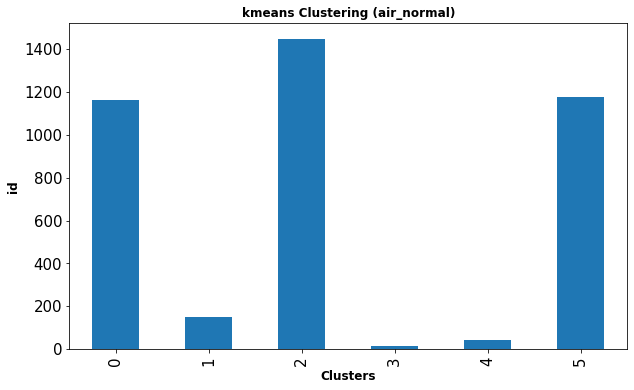

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
air.groupby(['Clusters']).count()['id'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('kmeans Clustering (air_normal)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('id', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
# Hierarchial Clustering

In [43]:
import scipy.cluster.hierarchy as sch

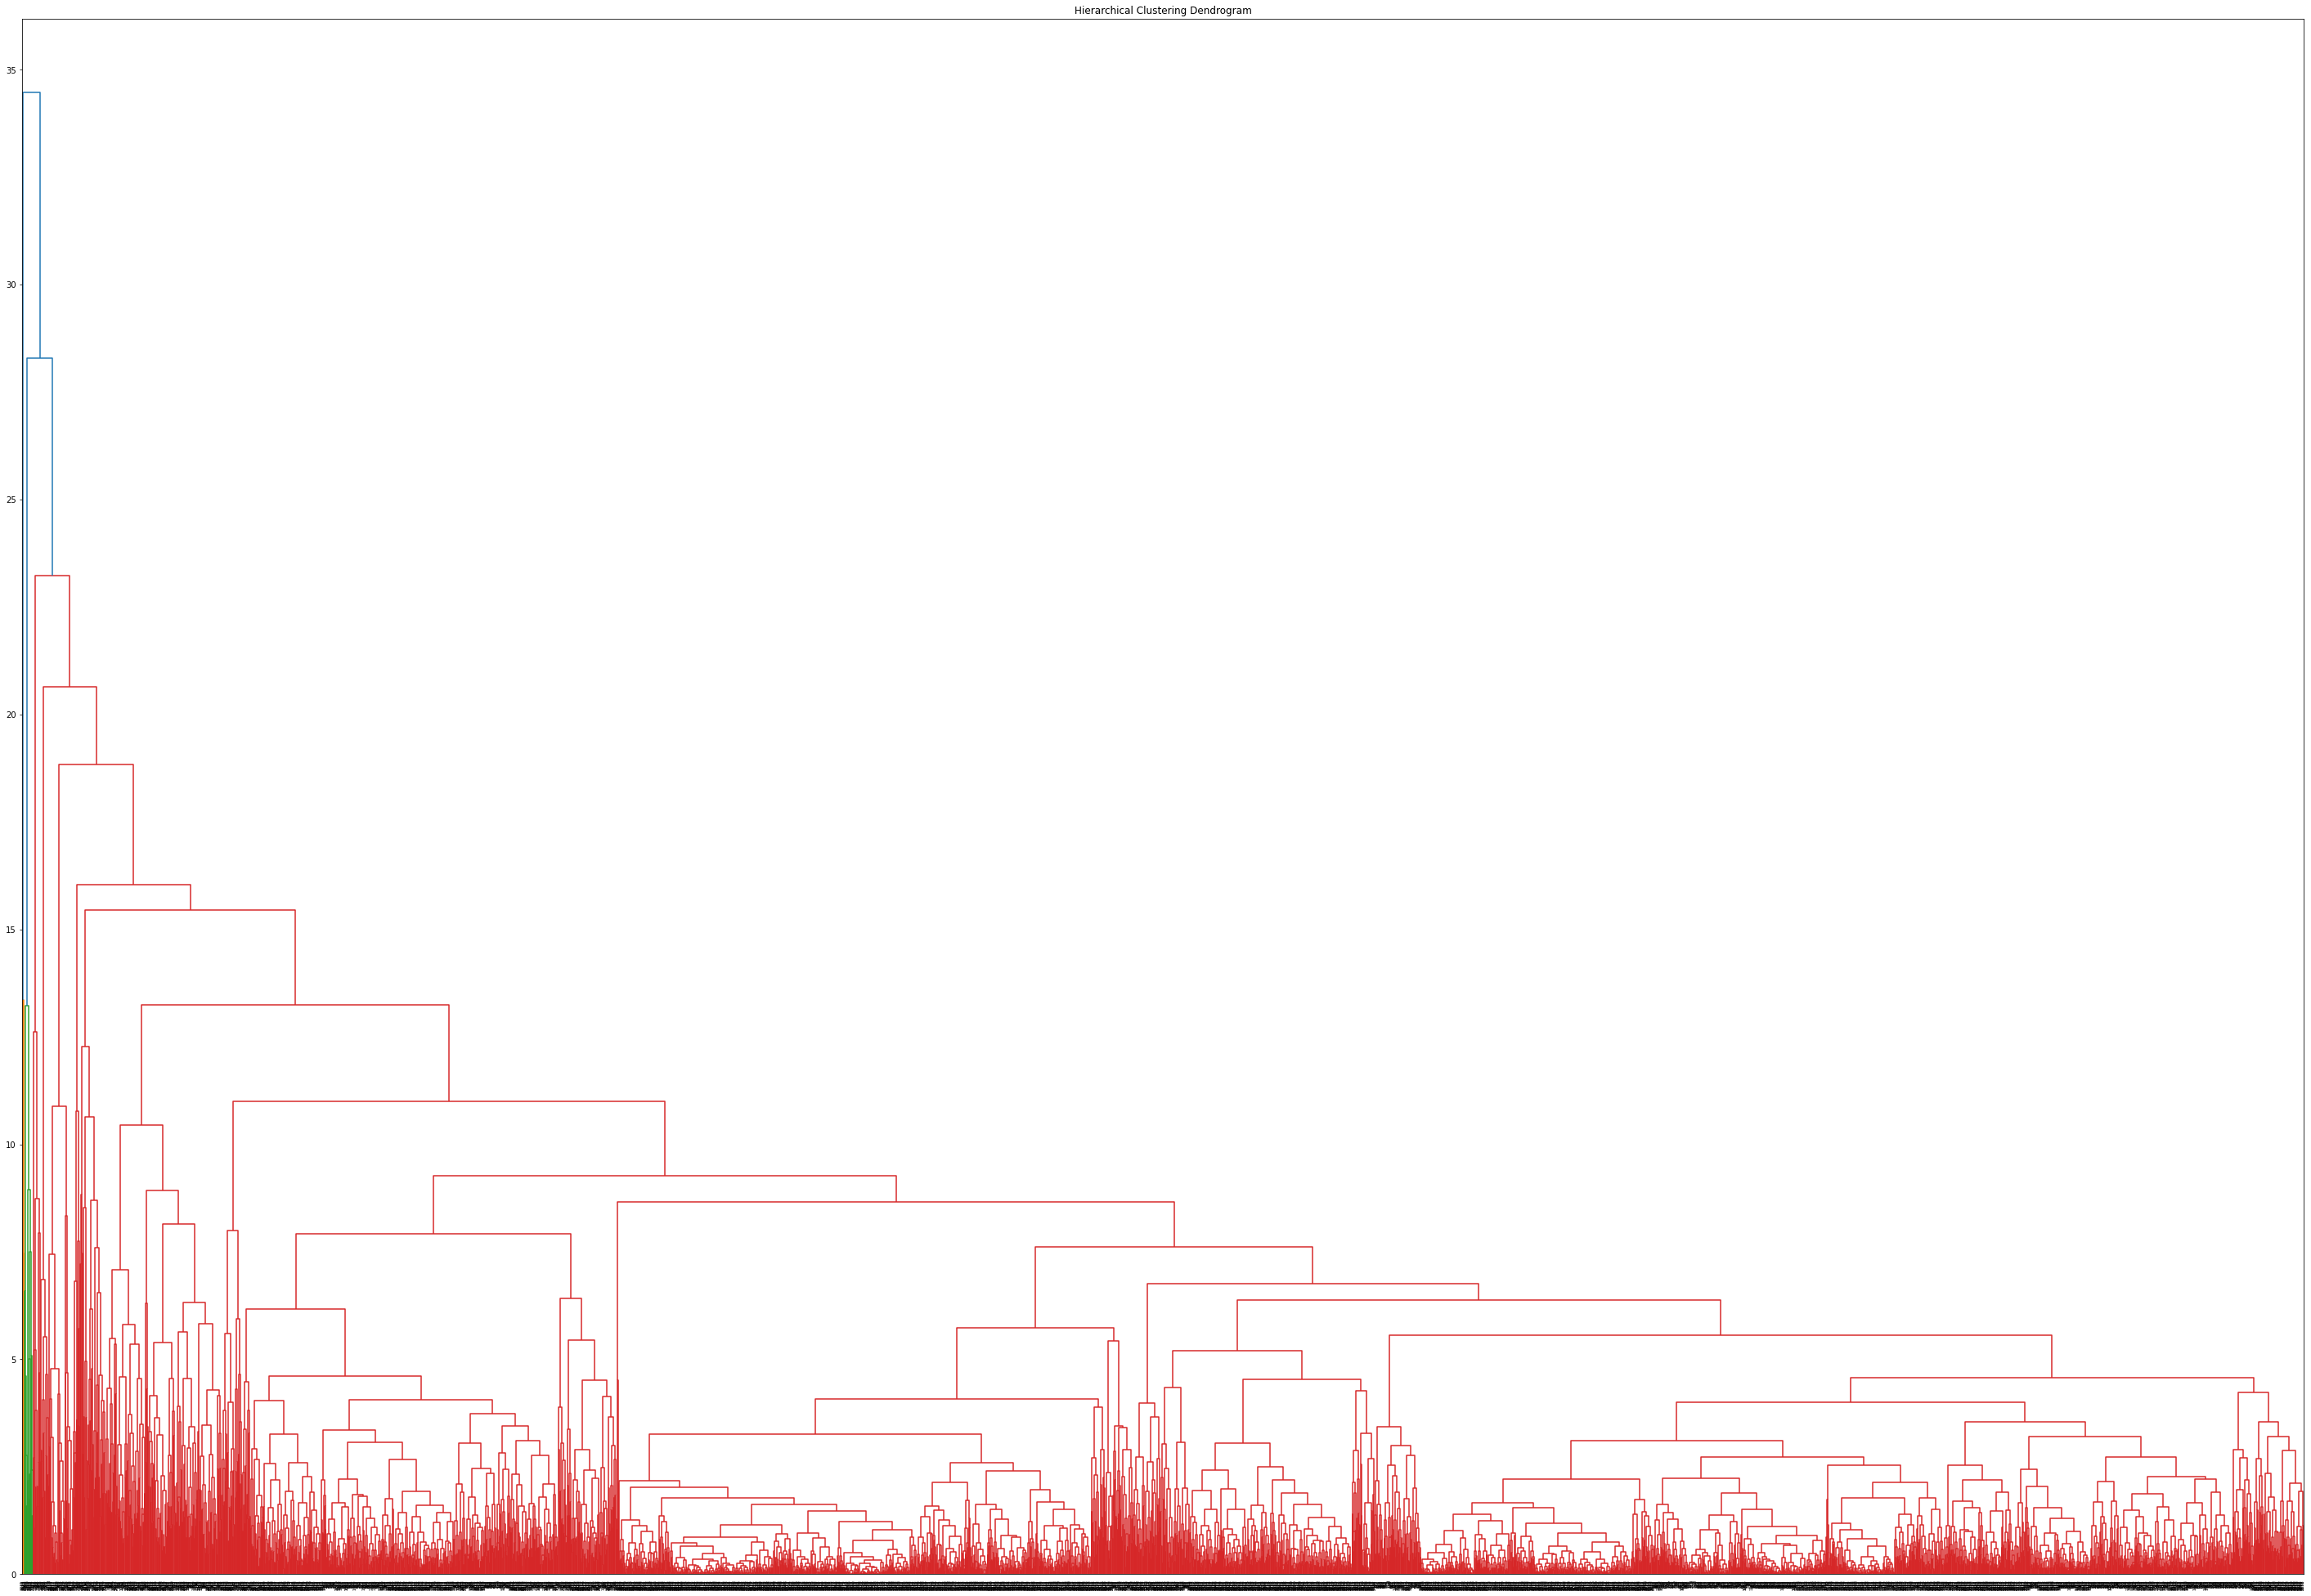

In [46]:
from scipy.cluster.hierarchy import linkage 
z = linkage(air_normal, method="complete",metric="euclidean")
plt.figure(figsize=(50, 35))air_normal
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

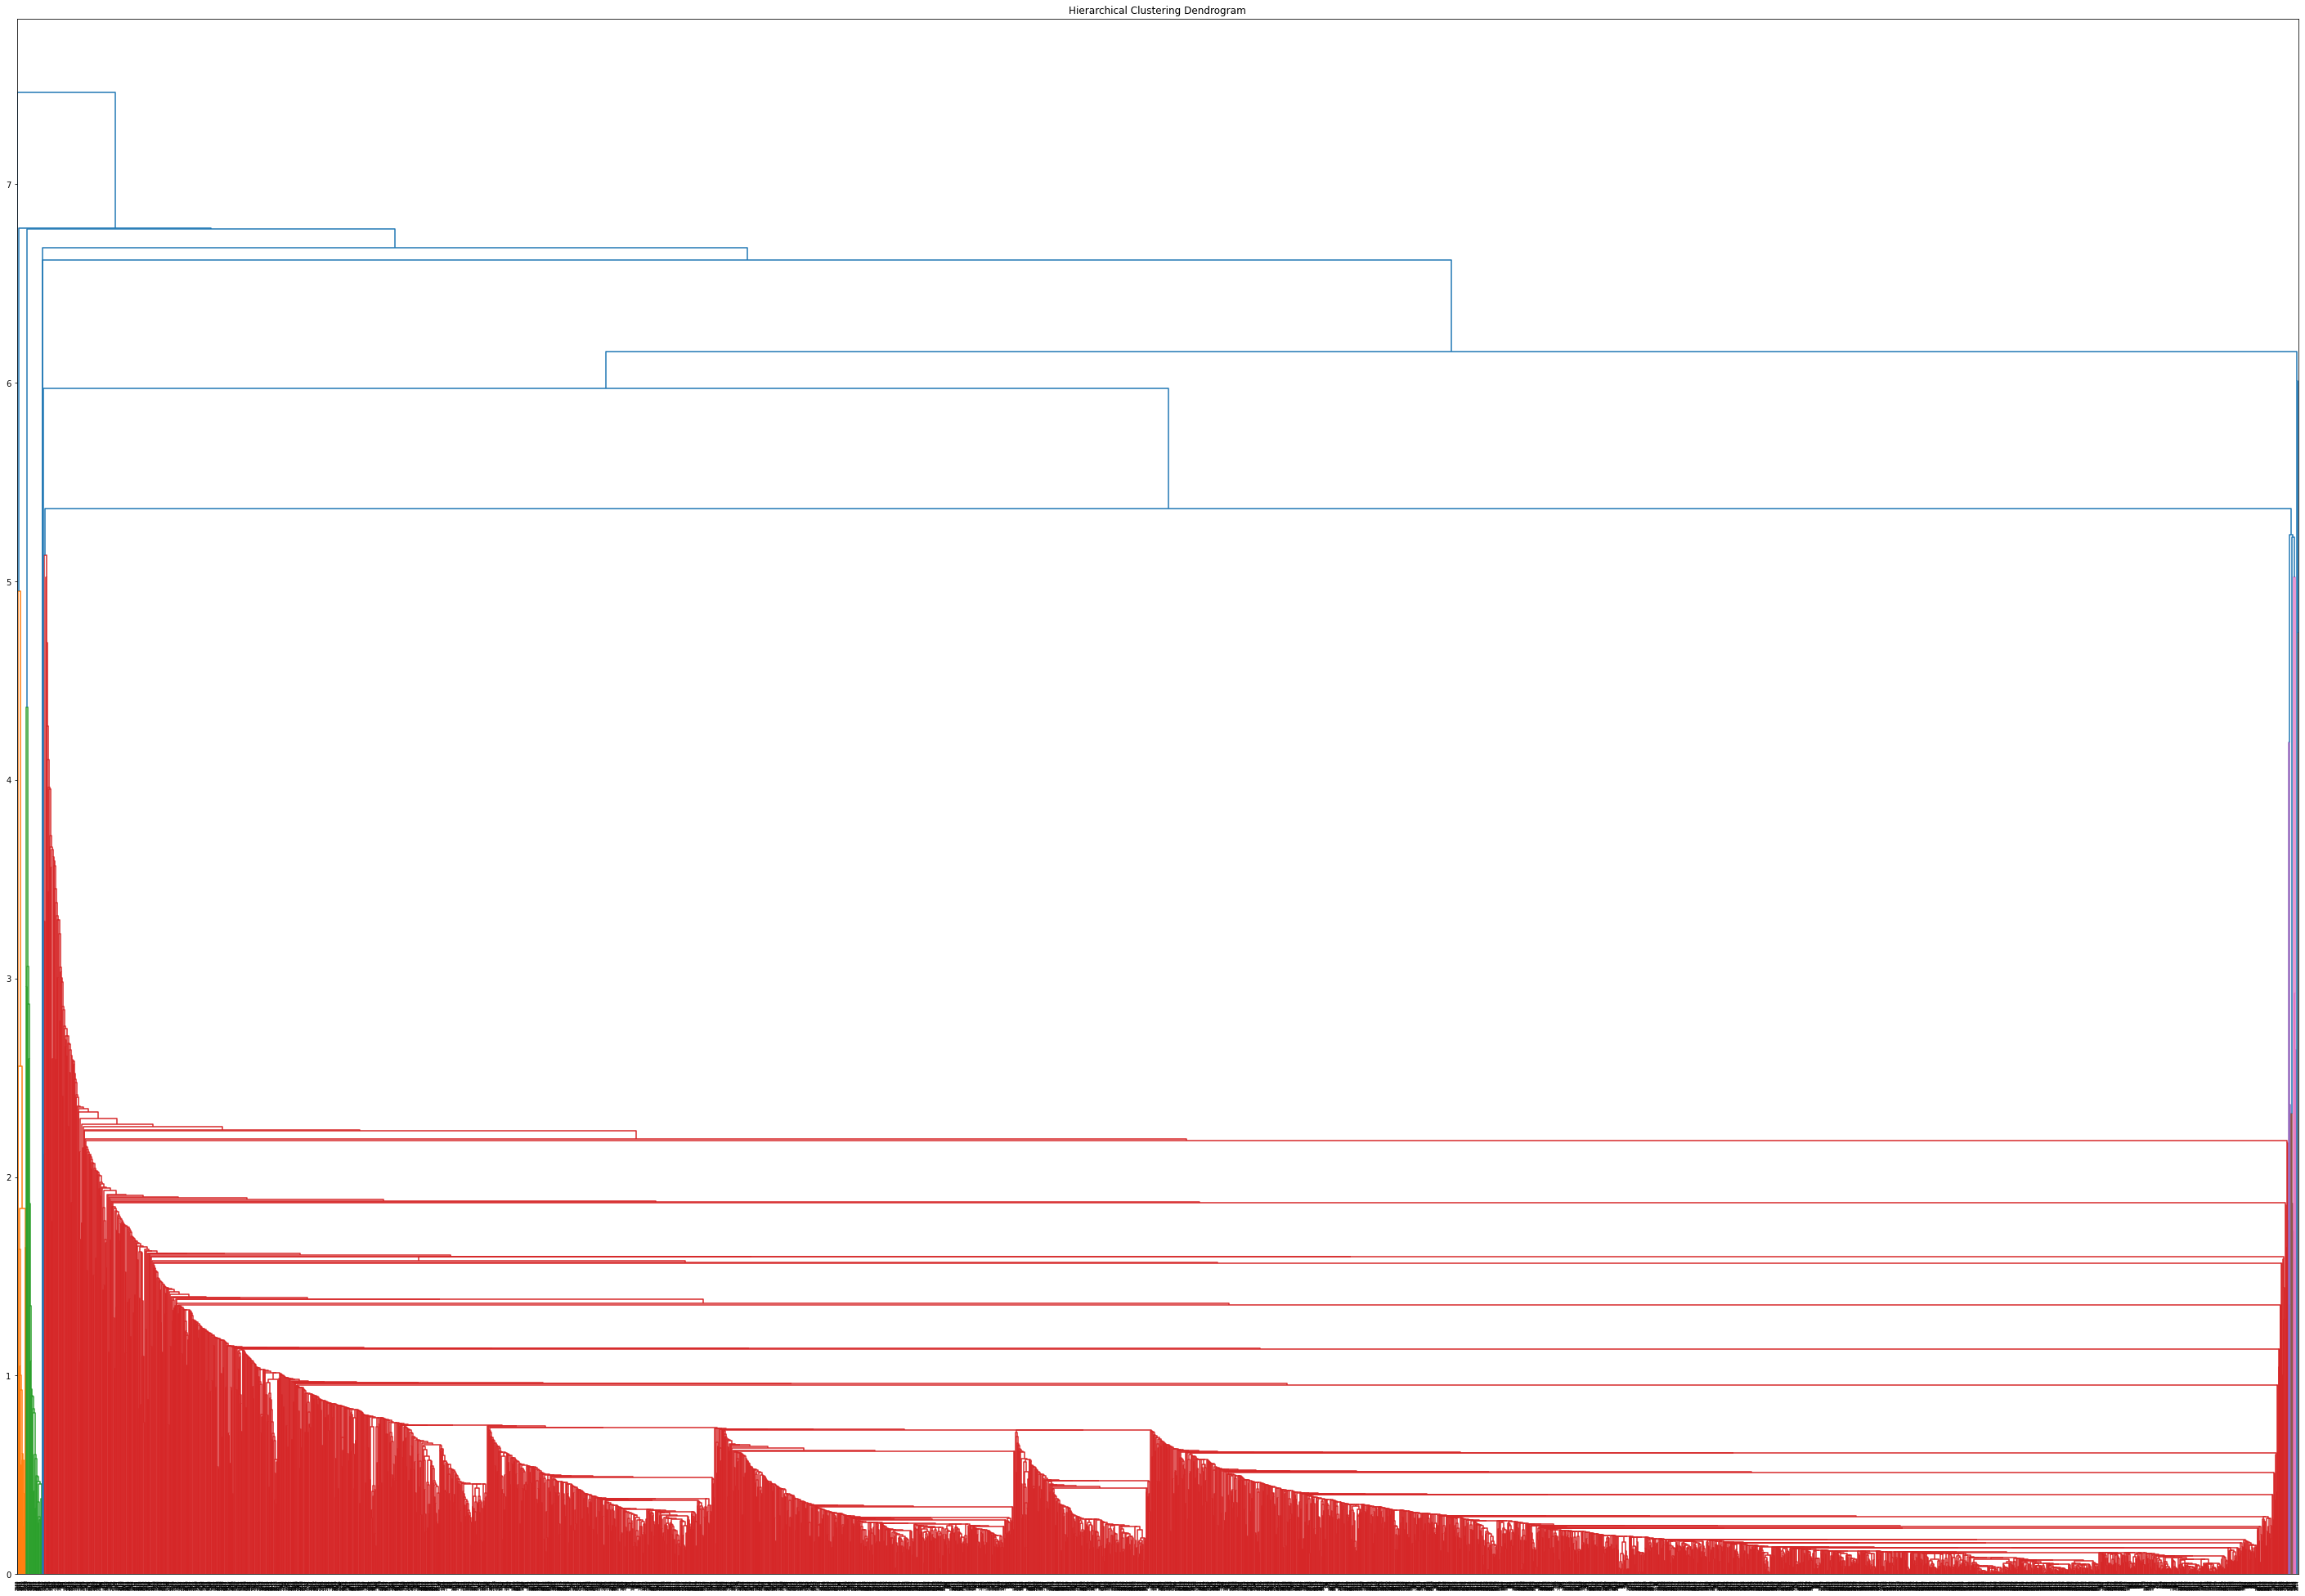

In [47]:
from scipy.cluster.hierarchy import linkage 
z = linkage(air_normal, method="single",metric="euclidean")
plt.figure(figsize=(50, 35))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

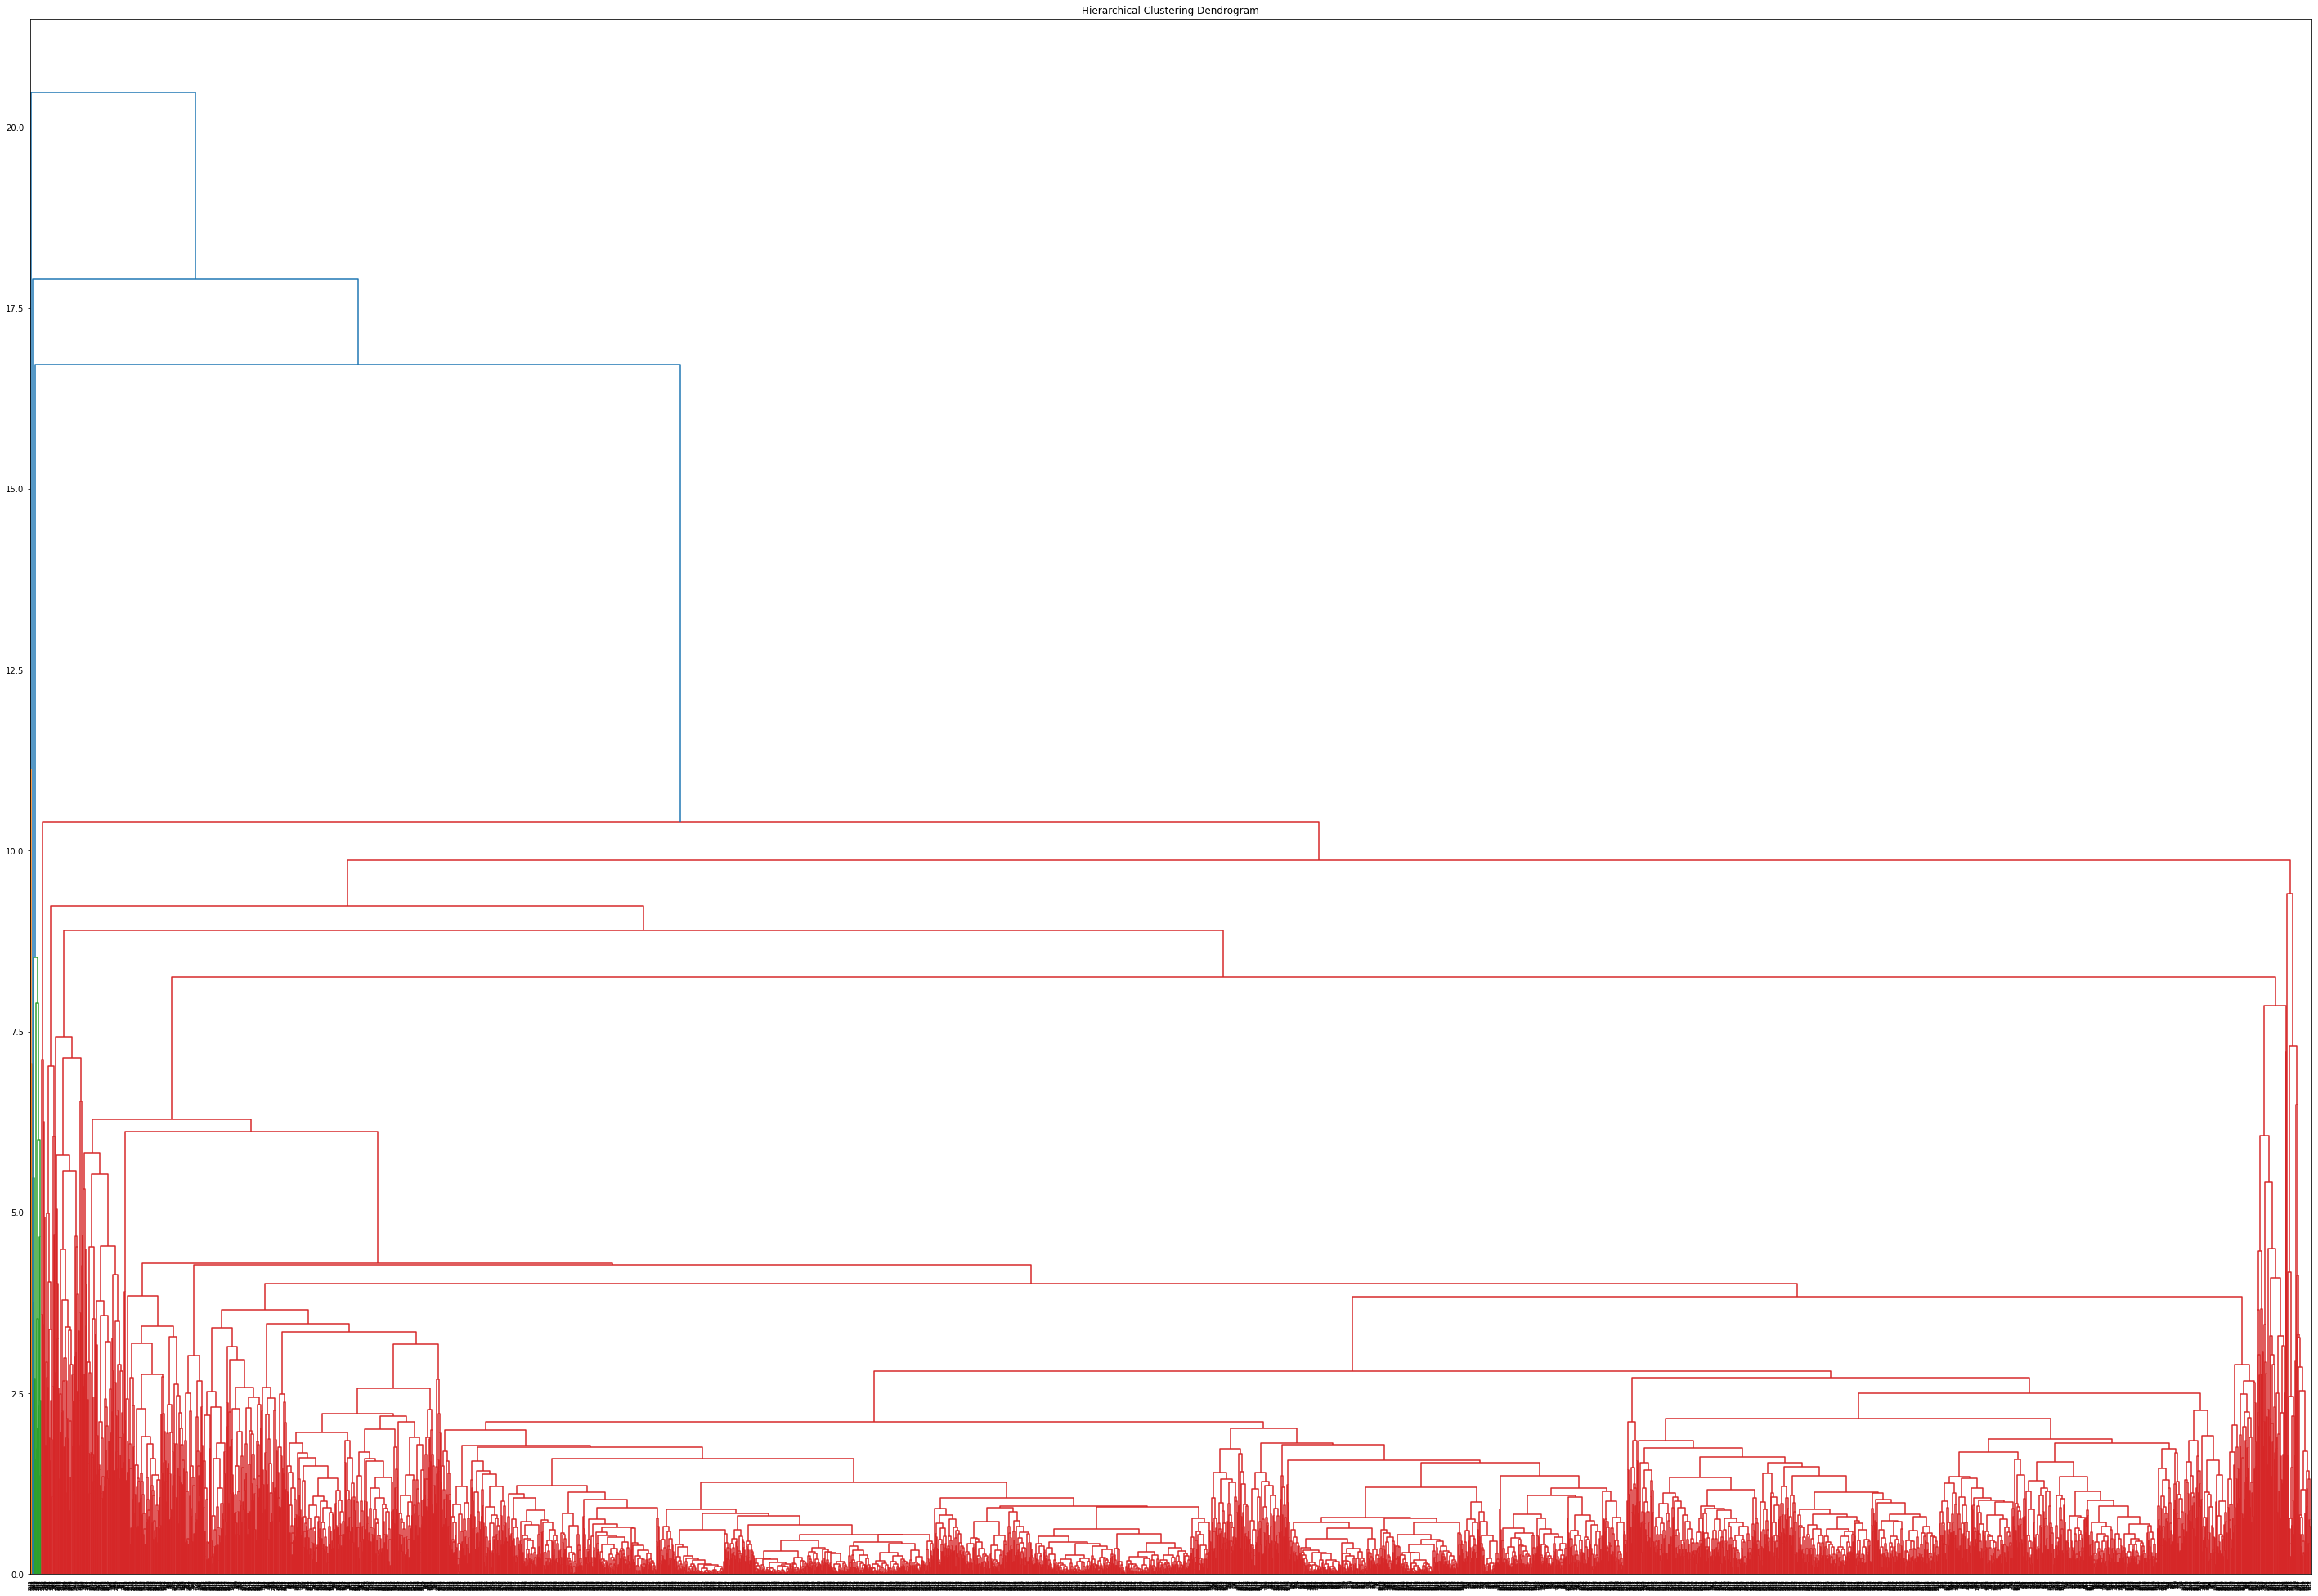

In [48]:
from scipy.cluster.hierarchy import linkage 
z = linkage(air_normal, method="average",metric="euclidean")
plt.figure(figsize=(50, 35))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

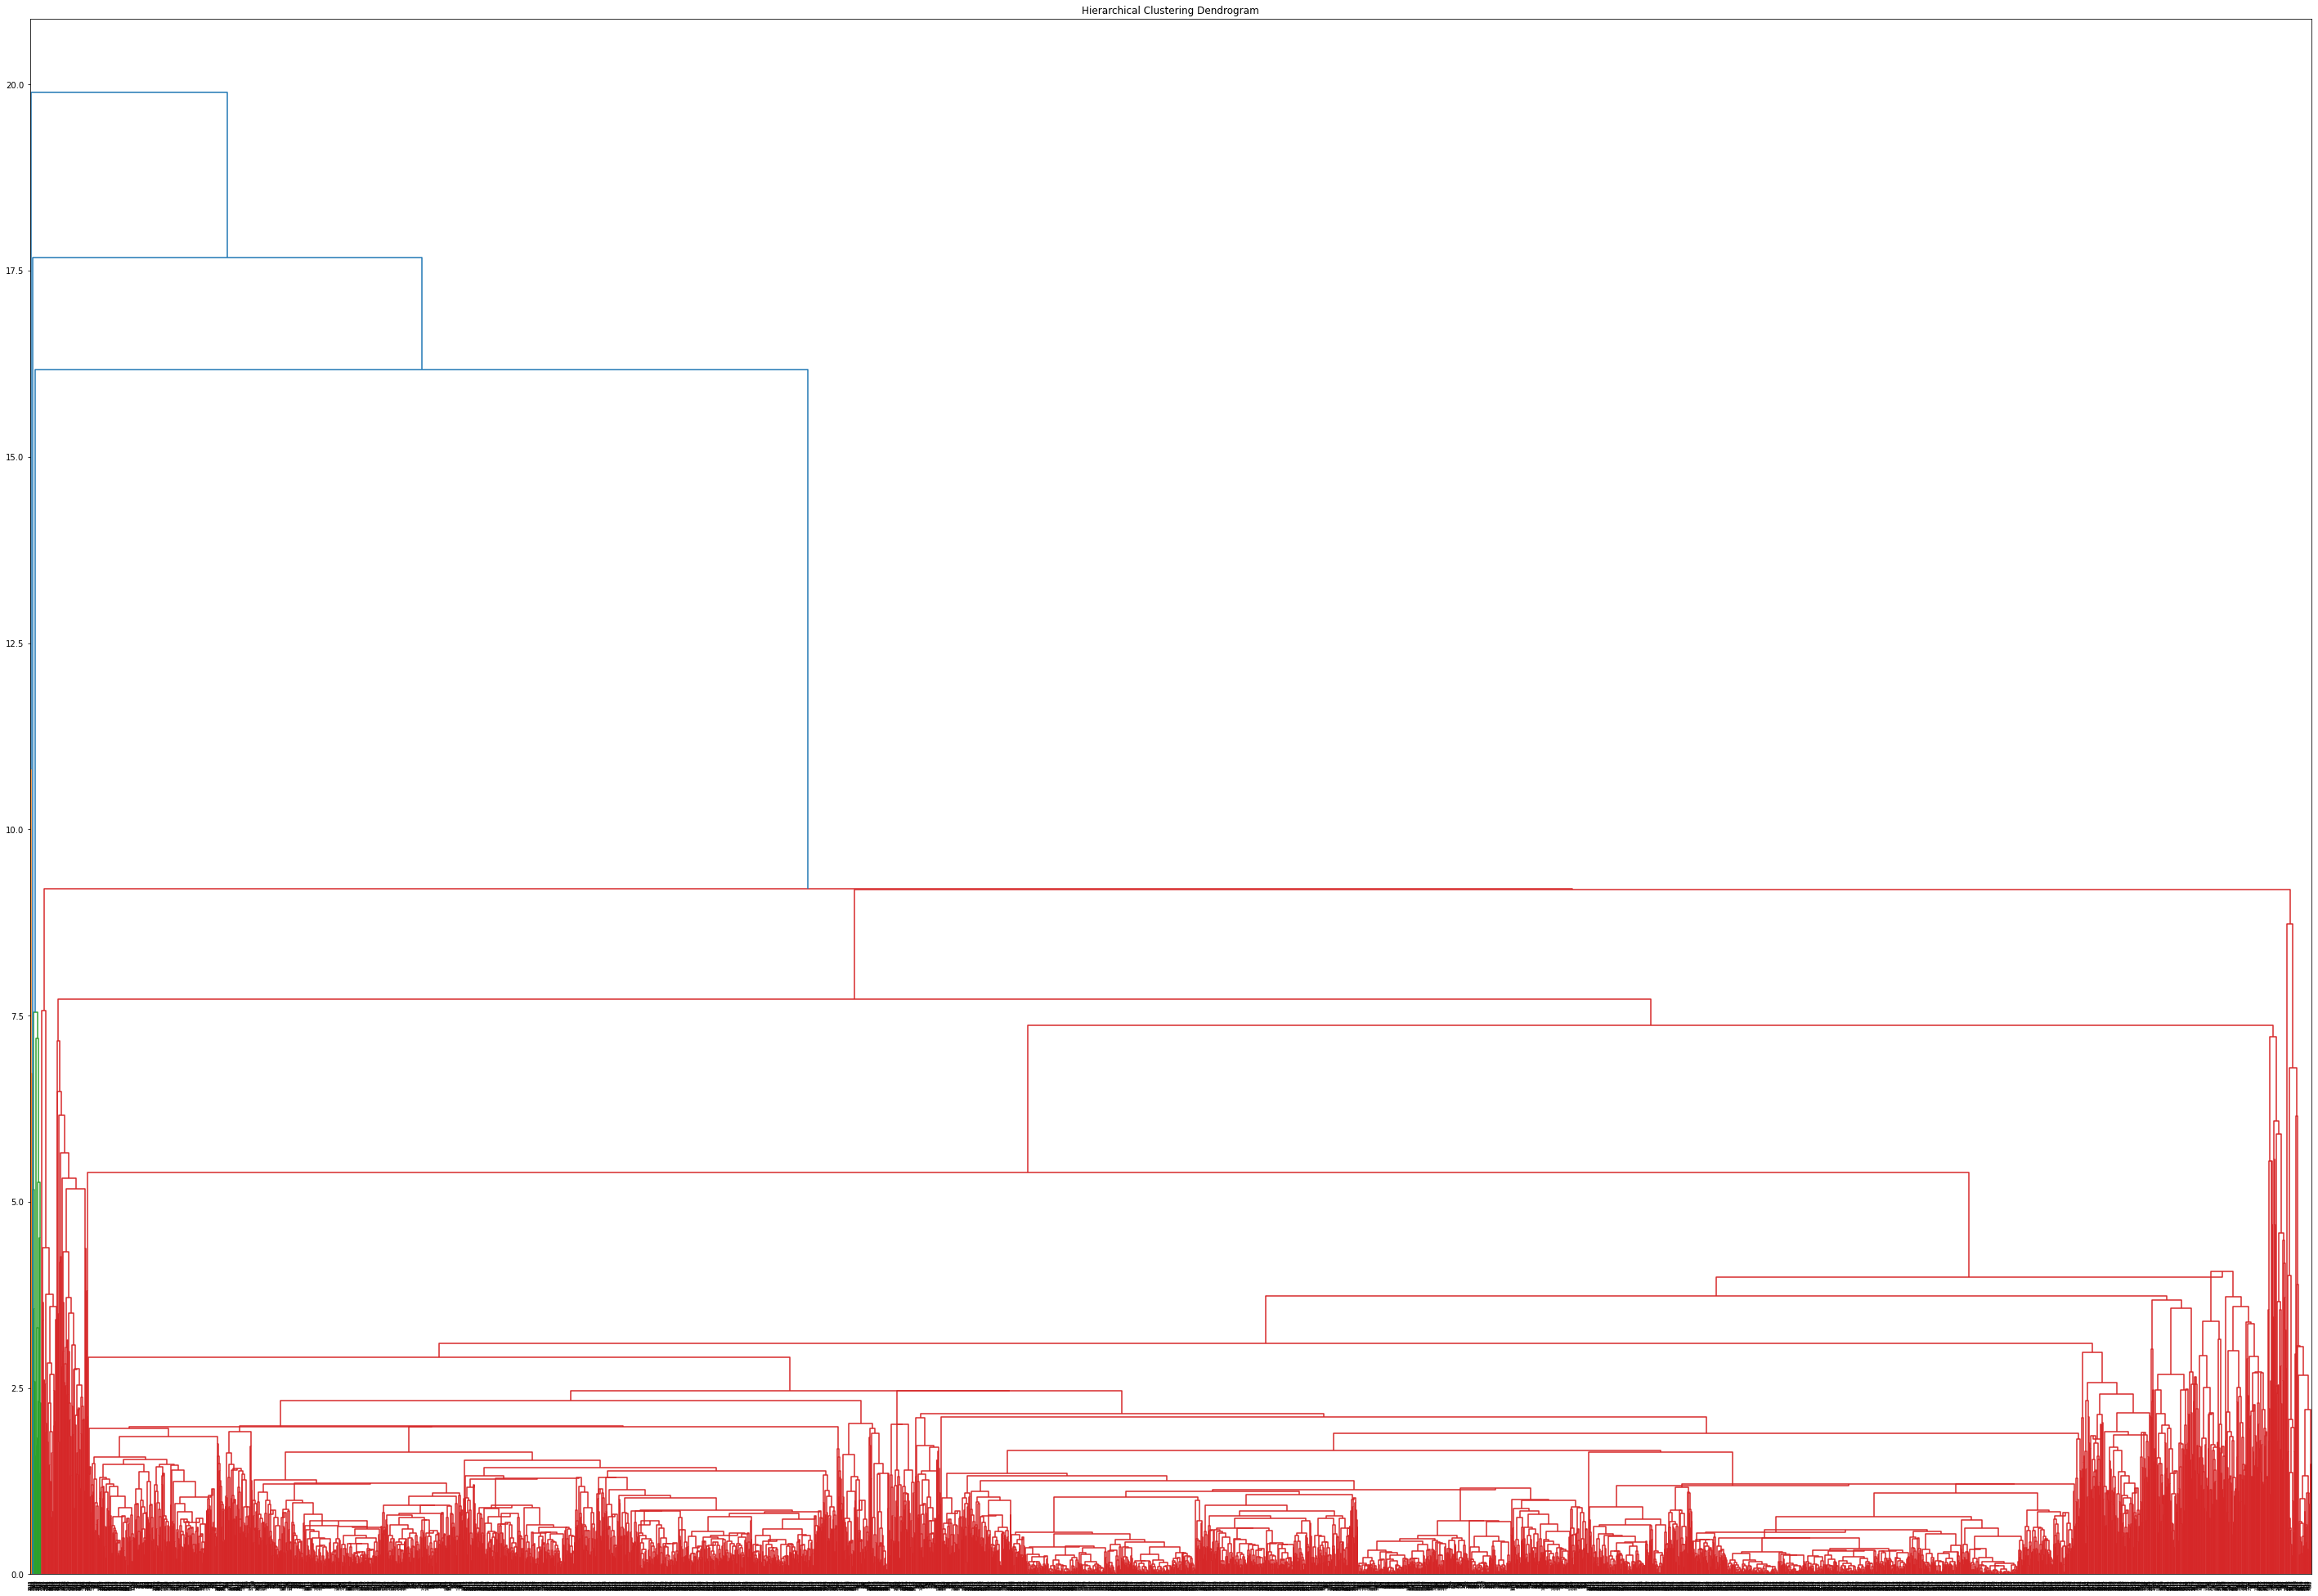

In [49]:
from scipy.cluster.hierarchy import linkage 
z = linkage(air_normal, method="centroid",metric="euclidean")
plt.figure(figsize=(50, 35))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
#We are not able to see number clusters  - Applying silhouette_score

In [50]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(air_normal)
        silhouette_score2 = silhouette_score(air_normal, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.32507831694250006
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8256575339976112
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8256575339976112
For n_clusters = 2 The average silhouette_score with linkage- single : 0.867447784990924

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31619409882758315
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7938964005121698
For n_clusters = 3 The average silhouette_score with linkage- average : 0.8003599006619796
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7558737036833013

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3350233247024554
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.665996385744917
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7910117556031853
For n

In [ ]:
# Model 3 Hierarchial Clustering without PCA  Cluster =5 Average Linkage

In [66]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [67]:
# save clusters for chart
y_hc = hc1.fit_predict(air_normal)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
clusters=pd.Series(y_hc)
print("Clusters",'',clusters.unique())

Clusters  [0 1 2 3 4]


In [69]:
air1['Clusters'] =pd.DataFrame(y_hc,columns=['Clusters'])

In [70]:
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [71]:
result_hier_withoutpca=air1.groupby(air1.Clusters).mean()
result_hier_withoutpca=pd.DataFrame(result_hier_withoutpca)
result_hier_withoutpca

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clusters,,,,,,,,,,
0,7.288966e+04,144.193013,2.054034,1.014577,1.000754,16806.654184,11.476753,439.180699,1.319176,4117.825333
1,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000
3,1.226280e+05,296.000000,3.000000,1.000000,1.000000,63527.666667,63.666667,16341.000000,48.000000,2476.000000
4,1.601140e+05,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000


In [72]:
air['Clusters'] =clusters
air

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


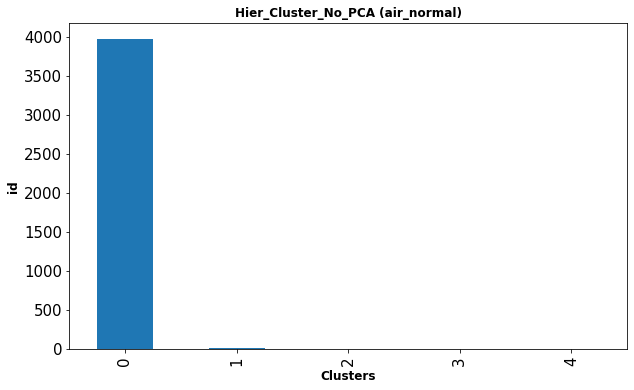

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
air.groupby(['Clusters']).count()['id'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hier_Cluster_No_PCA (air_normal)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('id', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
#Model 4 Hierarchial Clustering with PCA- Avergae Linkage Cluster =5

In [75]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [76]:
# save clusters for chart
y_hc = hc1.fit_predict(pca_std_df)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
clusters=pd.Series(y_hc)
print("Clusters",'',clusters.unique())

Clusters  [0 2 1 4 3]


In [78]:
air1['Clusters'] =pd.DataFrame(y_hc,columns=['Clusters'])

In [79]:
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [80]:
result_hier_withpca=air1.groupby(air1.Clusters).mean()
result_hier_withpca=pd.DataFrame(result_hier_withpca)
result_hier_withpca

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clusters,,,,,,,,,,
0,7.034814e+04,142.254224,2.050189,1.014628,1.000757,16517.986129,11.442623,433.414124,1.299369,4106.548298
1,1.050176e+06,970.600000,2.000000,1.000000,1.000000,25607.500000,17.200000,1944.300000,8.300000,7326.700000
2,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
4,4.601292e+05,0.000000,5.000000,1.000000,1.000000,228179.000000,31.200000,2878.600000,7.400000,7275.800000


In [81]:
air['Clusters'] =clusters
air

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


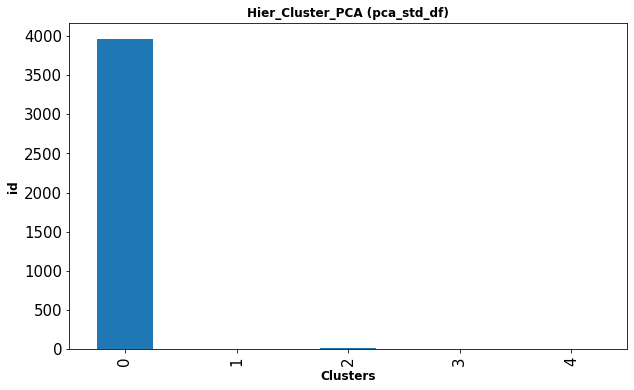

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))
air.groupby(['Clusters']).count()['id'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hier_Cluster_PCA (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('id', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()